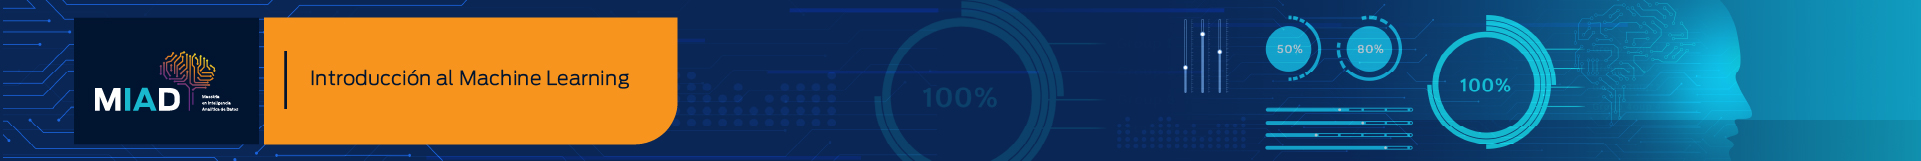

# Introducción al Machine Learning - Semana 6
## Caso: implementación de metodologías de imputación de variables e imbalanceo de clases


### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para gestionar situaciones de datos faltantes e imbalanceo de clases.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Primer conjunto de datos

Utilice el archivo de datos "Missing data.csv" que se encuentra en este repositorio para hacer los siguientes tres puntos:

### 1. Análisis preliminar de variables del primer conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el primer conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

sns.set_style()

In [3]:
data = pd.read_csv("MissingData.csv")
data.head()

,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,...,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


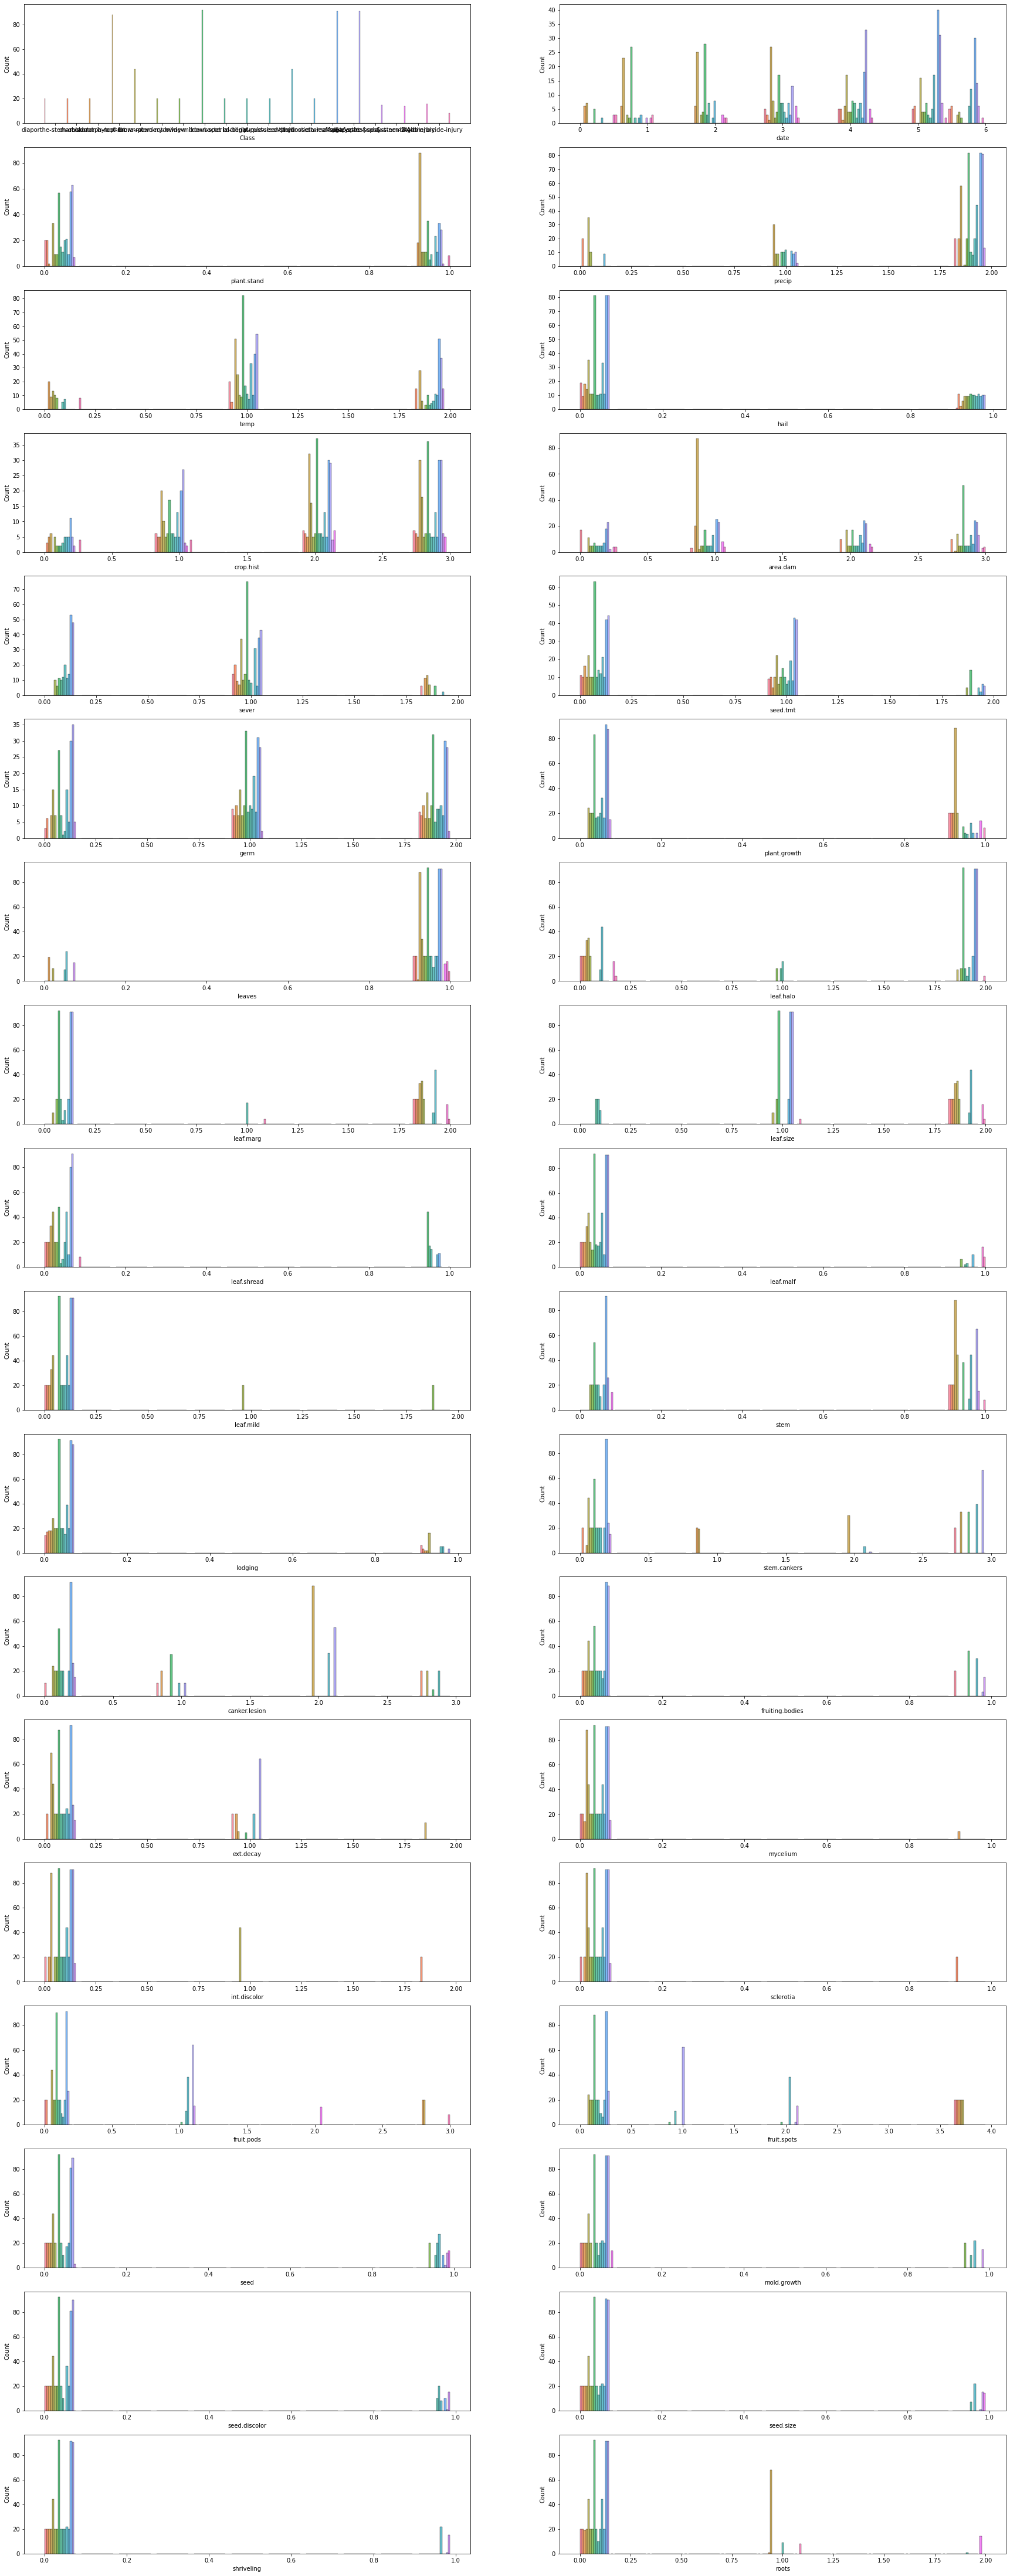

In [4]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 #### 
ncols = 2 
nrows = int(np.ceil(len(data.columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,80))
axs = ax.flatten()

for i,c in enumerate(data.columns.values):
    #if c != "Class":
    sns.histplot(data=data, x=c, ax = axs[i],hue="Class",multiple="dodge", legend=False)
    #axs[i].legend


<AxesSubplot:>

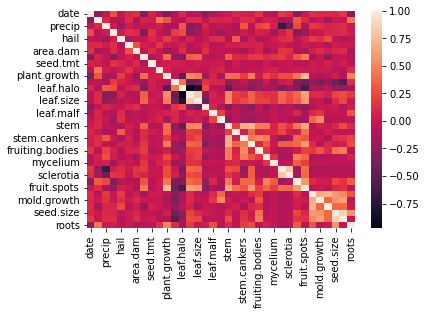

In [5]:
sns.heatmap(data.corr())

<AxesSubplot:>

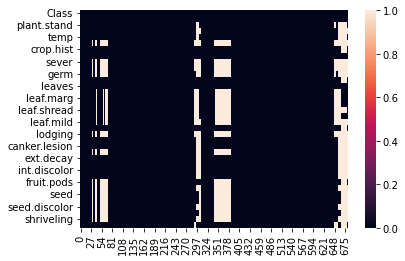

In [6]:
sns.heatmap(data.isna().T)

se evidencia que la falta de informacion se presenta en ciertas filas y suelen ser las mismas columnas para varios valores faltantes

**MAR**

### 2. Gestión de datos faltantes (25 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Con la muestra de entrenamiento, realicen un procedimiento de imputación simple multivariada para todas las variables que tengan datos faltantes en sus filas.

In [7]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Class"), data["Class"], test_size=0.2, random_state=7)

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(XTrain)

XTrain_imp = pd.DataFrame(imp.transform(XTrain))
XTest_imp = pd.DataFrame(imp.transform(XTest))

c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<AxesSubplot:>

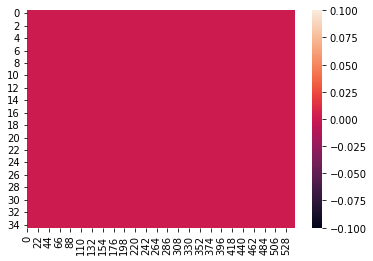

In [8]:
sns.heatmap(XTrain_imp.isna().T)

(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación de modelo de clasificación (10 puntos)
Escojan un modelo de clasificación de los vistos en la semana 3 del curso e impleméntenlo. Evalúen su poder predictivo en la muestra de evaluación debidamente transformada, de acuerdo a la imputación hecha en el conjunto entrenamiento.

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  3  1  0  0  1  0  0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

<AxesSubplot:>

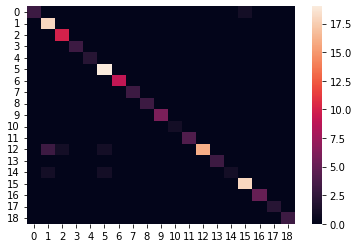

In [9]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

LDA = LinearDiscriminantAnalysis()

LDA.fit(XTrain_imp, yTrain)
predict = LDA.predict(XTest_imp)
predict_prob = LDA.predict_proba(XTest_imp)

error=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=predict[i]):
        error+=1/len(yTest)
#print('El error de clasificación para {modelo} en la muestra de test es:{s}'.format(modelo="QDA",s=error))

print(confusion_matrix(y_true=yTest, y_pred=predict))
accuracy=accuracy_score(y_true=yTest, y_pred=predict)
print("el valor de accuracy es de: {}".format(accuracy))
precisionRegLog= precision_score(y_true=yTest.values, y_pred=predict, average = "macro")
print("el valor de precission es de: {}".format(precisionRegLog))

sns.heatmap(confusion_matrix(y_true=yTest, y_pred=predict))


En este caso se ve que la clasificacion multivariada es efectiva, ya que la mayoria de los valores en la tabla de confusion se ubican en la diagonal, lo cual indica que son predicciones correctas, tambien se corrobora esto al calcular los valores de *precission* y *accuracy* ya que al tener valores altos indican la efectividad del modelo para predecir correctamente las bases

### Segundo conjunto de datos

Para los siguientes cinco puntos, utilice la base de datos "raw_df" que tiene información sobre tarjetas de crédito y se descarga con las siguientes líneas de código:

In [10]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 4. Análisis preliminar de variables del segundo conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el segundo conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [11]:
gr = raw_df.groupby("Class")[["V1"]].count()
gr["pct"] = gr["V1"]/gr["V1"].sum()
gr

,V1,pct
Class,,
0,284315,0.998273
1,492,0.001727


In [12]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:>

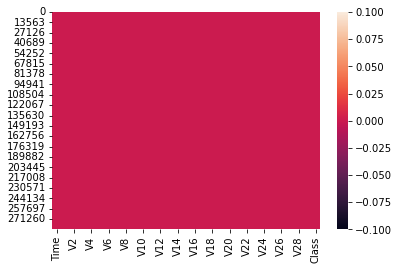

In [13]:
sns.heatmap(raw_df.isna())

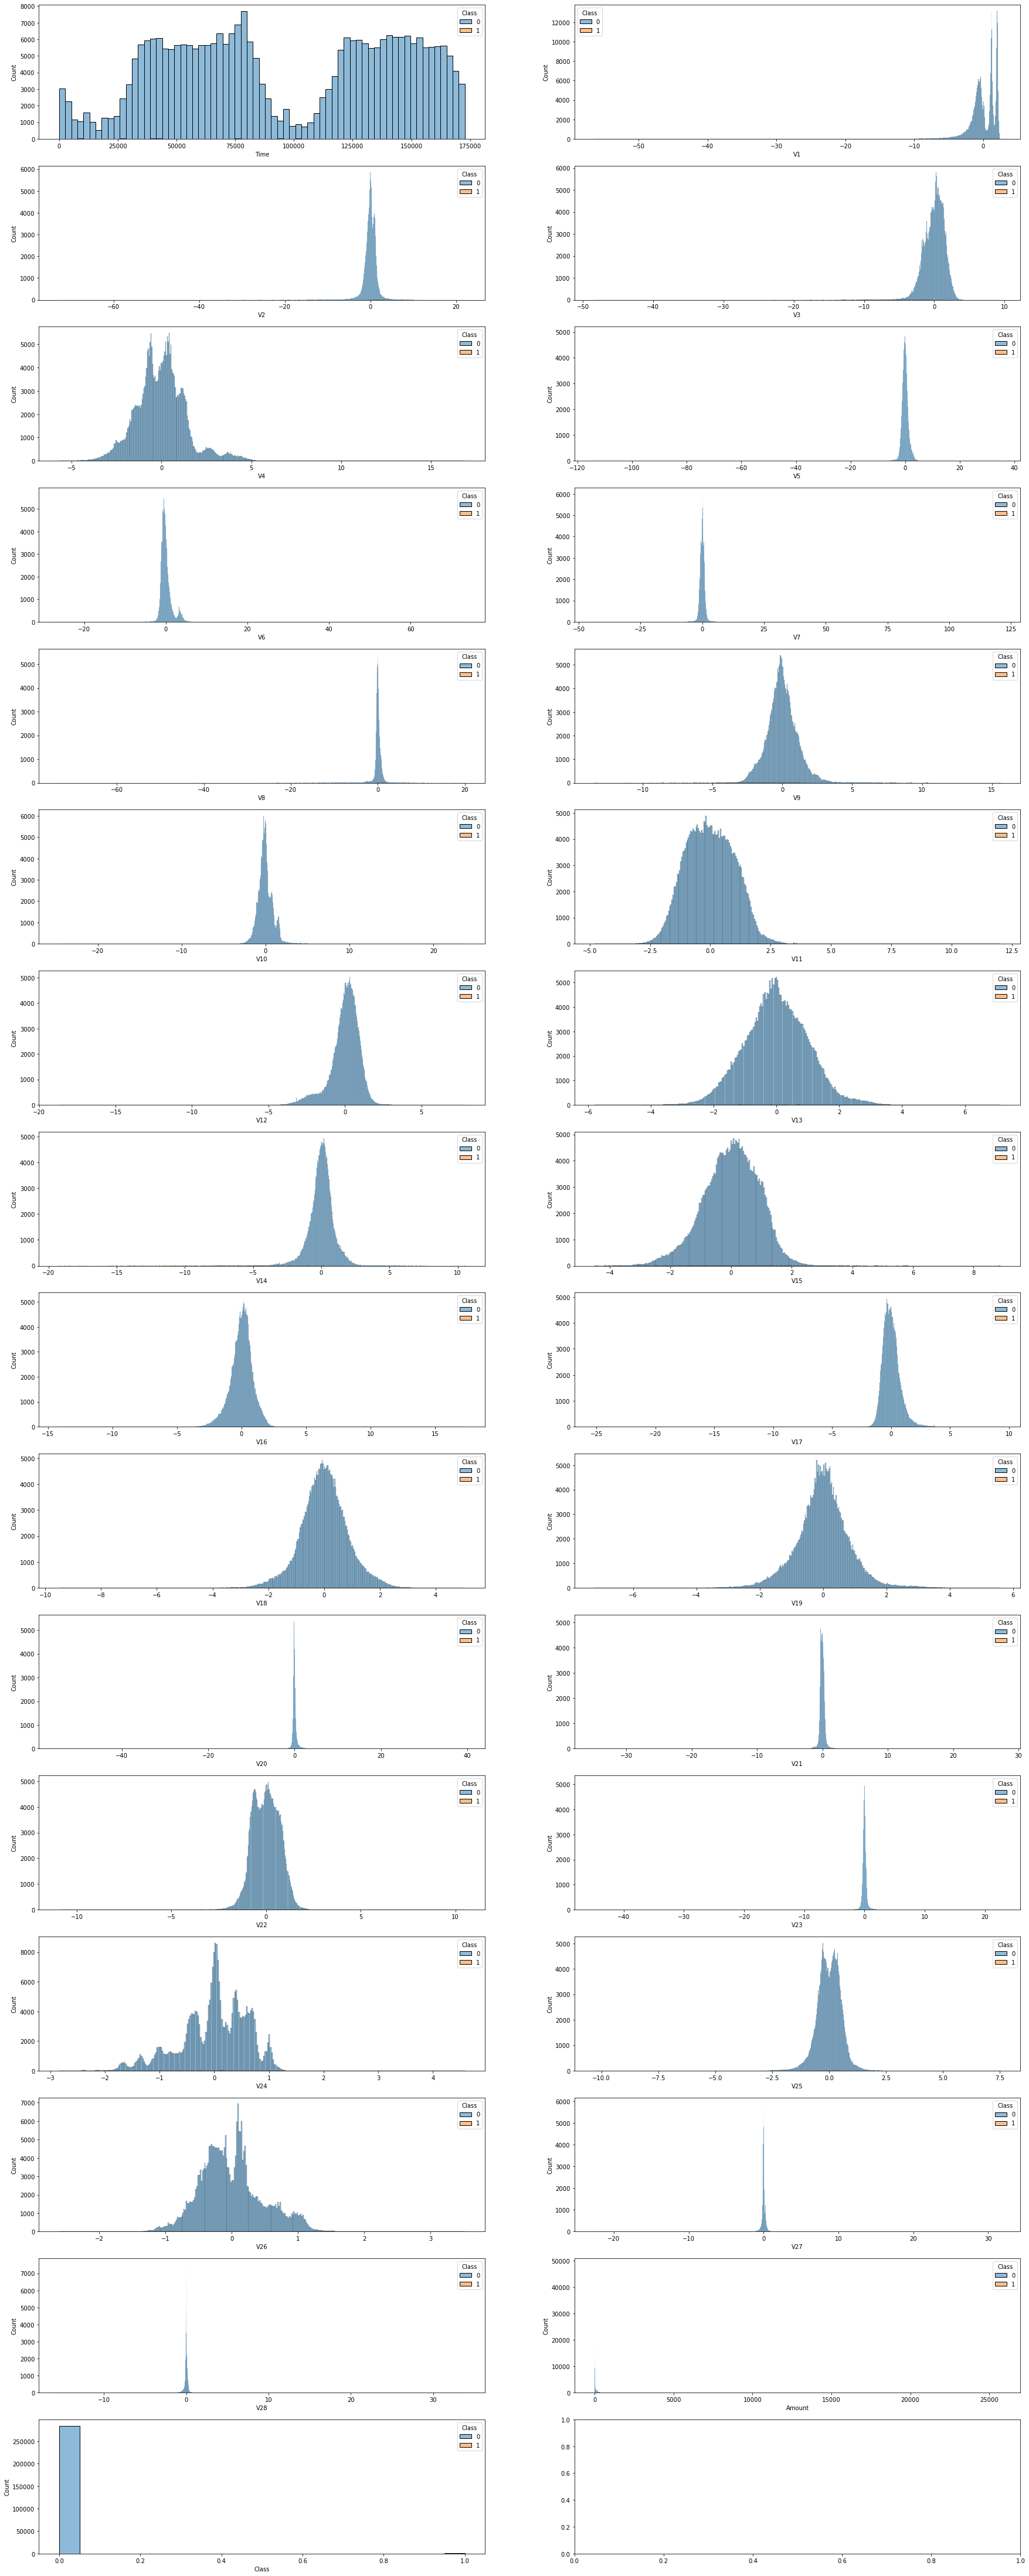

In [14]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 #### 
ncols = 2 
nrows = int(np.ceil(len(raw_df.columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,80))
axs = ax.flatten()

for i,c in enumerate(raw_df.columns.values):
    #if c != "Class":
    sns.histplot(data=raw_df, x=c, ax = axs[i],hue="Class")
    #axs[i].legend


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Implementación de QDA (10 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Una vez se ha hecho esto, calibren un modelo QDA con la muestra de entrenamiento y evalúen su poder predictivo en la muestra de evaluación.

El error de clasificación para QDA en la muestra de test es:0.025929567079808077
[[55400  1462]
 [   15    85]]
el valor de accuracy es de: 0.9740704329201925
el valor de precission es de: 0.054945054945054944


Text(0.5, 0, 'False Positive Rate')

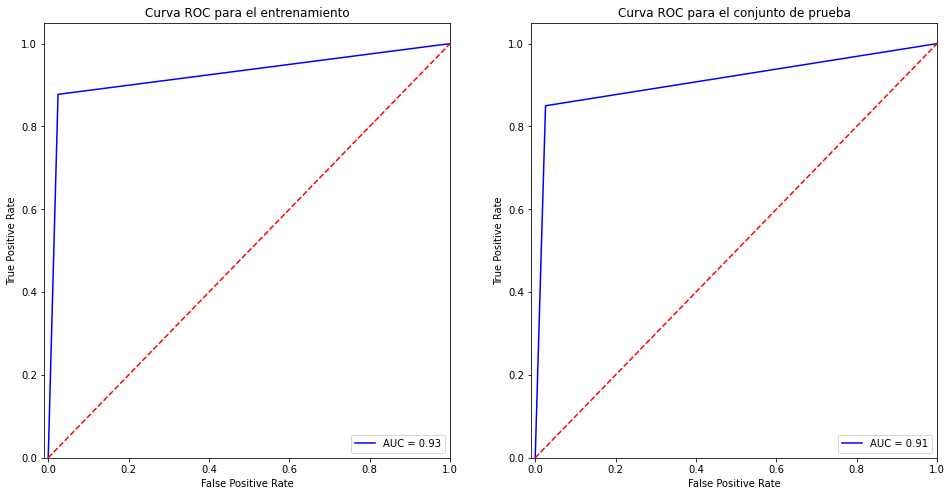

In [20]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

XTrain, XTest, yTrain, yTest = train_test_split(raw_df.drop(columns="Class"), raw_df["Class"], test_size=0.2, random_state=3)

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(XTrain, yTrain)

predict = QDA.predict(XTest)
predict_prob = QDA.predict_proba(XTest)


error=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=predict[i]):
        error+=1/len(yTest)
print('El error de clasificación para {modelo} en la muestra de test es:{s}'.format(modelo="QDA",s=error))

print(confusion_matrix(y_true=yTest, y_pred=predict))
accuracyQDA=accuracy_score(y_true=yTest, y_pred=predict)
print("el valor de accuracy es de: {}".format(accuracyQDA))
precisionQDA= precision_score(y_true=yTest.values, y_pred=predict)
print("el valor de precission es de: {}".format(precisionQDA))

# curva roc para Train
fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
fpr, tpr, thresholds = roc_curve(yTrain, QDA.predict(XTrain))
AUC_trainQDA = auc(fpr, tpr)
ax[0].set_title('Curva ROC para el entrenamiento')
ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_trainQDA)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')

# curva roc para Test
fpr, tpr, thresholds = roc_curve(yTest, predict)
AUC_testQDA = auc(fpr, tpr)
ax[1].set_title('Curva ROC para el conjunto de prueba')
ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_testQDA)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

El modelo tiene una metrica del *AUC = 0.91* lo cual indica un desempeño favorable del modelo,sin embargo al ver los valores de la variable *precission* la cual indica la proporcion de predicciones correctas realizadas sobre el total de predicciones, se evidencia que menos del 60& de las predicciones que realiza el modelo son correctas. Dependiendo del contexto del modelo este puede ser un resultado desfavorable o aceptable. será desfavorable en un contexto en el cual realizar una prediccion erronea tenga un alto costo.

### 6. Gestión de imbalanceo de clases (25 puntos)
Realicen un procedimiento para gestionar las clases imbalanceadas de la base de datos con el conjunto de entrenamiento. 

In [16]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####

sm = SMOTE(random_state=7)
XTrain_res, yTrain_res = sm.fit_resample(XTrain, yTrain)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)

### 7. Implementación de random forest (10 puntos)
Estimen un modelo random forest para predecir la variable de respuesta y midan su desempeño en la muestra de evaluación.

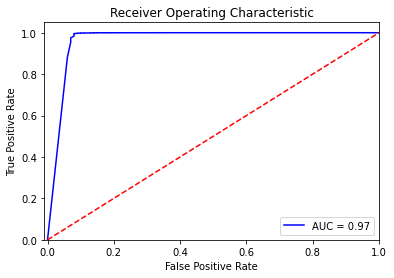

In [17]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 7 ####

RandomForest = RandomForestClassifier(random_state=3)
RandomForest.fit(XTrain_res, yTrain_res)

prediccionRF=RandomForest.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
predict = RandomForest.predict(XTest)

print(confusion_matrix(y_true=yTest, y_pred=predict))
accuracyRF = accuracy_score(y_true=yTest, y_pred=predict)
print("el valor de accuracy es de: {}".format(accuracyRF))
precisionRF = precision_score(y_true=yTest.values, y_pred=predict)
print("el valor de precission es de: {}".format(precisionRF))

[[56851    11]
 [   18    82]]
el valor de accuracy es de: 0.9994908886626171
el valor de precission es de: 0.8817204301075269


En este caso se ve una mejora en las metricas evaluadas tanto el *AUC* y *precission* el resto del analisis se realizará en el punto 8

### 8. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los dos modelos estimados (QDA sin balancear y random forest balanceando) en este caso resulta mejor para la predicción de la variable de respuesta en la segunda base de datos? Justifiquen su respuesta.

In [25]:
[AUC_testQDA, AUCRF]

[0.9121443143048081, 0.9652846364883403]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Tipo dataset')

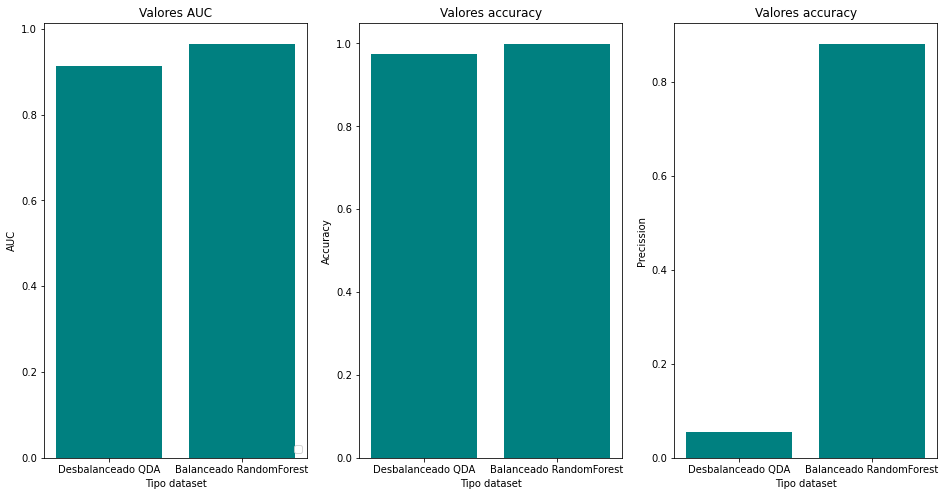

In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8))
fpr, tpr, thresholds = roc_curve(yTrain, QDA.predict(XTrain))

x_val = ["Desbalanceado QDA", "Balanceado RandomForest"]

ax[0].set_title('Valores AUC')
ax[0].bar(x_val, [AUC_testQDA, AUCRF], color='teal')
ax[0].legend(loc = 'lower right')
ax[0].set_ylabel('AUC')
ax[0].set_xlabel('Tipo dataset')

# curva roc para Test
ax[1].set_title('Valores accuracy')
ax[1].bar(x_val, [accuracyQDA, accuracyRF], color='teal')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Tipo dataset')


ax[2].set_title('Valores accuracy')
ax[2].bar(x_val, [precisionQDA, precisionRF], color='teal')
ax[2].set_ylabel('Precission')
ax[2].set_xlabel('Tipo dataset')

El mejor modelo es el random Forest, todas las medidas son superiores para este modelo, tanto el AUC como el accuracy y mas importante aun el valor de precision, ya que esto nos evidencia de forma directa que el modelo si logra detectar las clases de interes sin importar el desbalanceo de clases.

Con este ejercicio se concluye la efectividad de utilizar estrategias como el SMOTE para el manejo de clases desbalanceadas